# **Stock Investment Recommendation Model**

## **Business Overview for Stock Investment Recommendation Model**

---

**Project Title:** Stock Investment Recommendation System

**Overview:**  
This project aims to create a machine learning model that delivers personalized stock investment recommendations based on individual risk appetites. By analyzing historical data from Yahoo Finance, the system will suggest suitable investments across various sectors, empowering investors with data-driven insights to enhance their decision-making and improve investment outcomes.

## Business Understanding
The business questions we will be trying to answer are:
1. How can we categorize stocks into different risk levels that align with investor preferences?
2. How can we personalize stock recommendations based on each customer's risk appetite?
3. What data-driven insights can we provide to customers to increase their confidence in the recommended stocks?
4. What metrics should be used to evaluate the success of the recommendations (e.g., customer satisfaction, portfolio performance, customer retention)?

# Data Cleaning

In [437]:
# importing libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [438]:
# bringing in data 
data = pd.read_csv("final_stocks_data.csv")
data.head(20)

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,Beta
0,2022-01-03 00:00:00+00:00,AAPL,177.830002,182.880005,177.710007,182.009995,179.273621,104487900.0,1.232782
1,2022-01-03 00:00:00+00:00,XOM,61.240002,63.599998,61.209999,63.540001,57.618000,24282400.0,0.471497
2,2022-01-03 00:00:00+00:00,VZ,52.070000,52.560001,51.980000,52.439999,43.423004,18240100.0,0.337004
3,2022-01-03 00:00:00+00:00,V,217.520004,222.059998,217.009995,221.429993,216.793564,7694500.0,0.867907
4,2022-01-03 00:00:00+00:00,TSLA,382.583344,400.356659,378.679993,399.926666,399.926666,103931400.0,1.909699
5,2022-01-03 00:00:00+00:00,T,18.716011,19.320242,18.716011,19.206949,15.772992,76970210.0,0.383581
6,2022-01-03 00:00:00+00:00,PG,161.690002,162.940002,159.880005,162.899994,151.253036,9317300.0,0.386962
7,2022-01-03 00:00:00+00:00,PFE,58.500000,58.549999,56.340000,56.650002,50.231384,57219200.0,0.456328
8,2022-01-03 00:00:00+00:00,NVDA,29.815001,30.711000,29.785000,30.121000,30.073063,391547000.0,2.300627
9,2022-01-03 00:00:00+00:00,NKE,167.529999,167.910004,163.309998,164.669998,158.935165,5670500.0,1.177935


In [439]:
# Checking for nan
data.isna().sum()

Date         0
Symbol       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Beta         0
dtype: int64

In [440]:
data.isnull().sum()

Date         0
Symbol       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Beta         0
dtype: int64

In [441]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Beta
count,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,2.145000e+04,21450.000000
mean,165.502818,167.380023,163.595675,165.528565,162.928384,3.650411e+07,0.936610
std,144.517485,146.171365,142.767715,144.503328,144.790031,9.101992e+07,0.509190
min,10.971000,11.735000,10.813000,11.227000,11.216744,9.427000e+05,0.253678
25%,62.304999,62.775001,61.757500,62.312501,59.463318,5.438000e+06,0.471497
50%,128.504997,130.000000,127.004749,128.449997,123.171261,1.176420e+07,0.823051
75%,198.694996,200.940002,196.529995,199.029999,197.360813,2.836222e+07,1.336116
max,957.770020,972.530029,951.580017,960.020020,960.020020,1.543911e+09,2.300627


In [442]:
data.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Beta'],
      dtype='object')

In [443]:
# removing for outliers
def remove_outliers_zscore(data, numerical_cols, threshold=3):
    """
    Removes outliers from the given DataFrame using the Z-score method.

    Parameters:
    -----------
    data : pd.DataFrame
        The input DataFrame containing the data.
    numerical_cols : list
        List of numerical columns to check for outliers.
    threshold : float, optional (default=3)
        The Z-score threshold to use for outlier detection.

    Returns:
    --------
    pd.DataFrame
        A new DataFrame with outliers removed.
    """
    # Calculate Z-scores for the numerical columns
    z_scores = data[numerical_cols].apply(zscore)

    # Create a mask for non-outliers (Z-scores within the threshold)
    mask = (np.abs(z_scores) < threshold).all(axis=1)

    # Return the filtered DataFrame without outliers
    return data[mask]

# calling the function
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_cleaned = remove_outliers_zscore(data, numerical_cols)

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

# Optional: Save the cleaned data to a CSV




Original data shape: (21450, 9)
Cleaned data shape: (20371, 9)


In [444]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20371 entries, 0 to 21449
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20371 non-null  object 
 1   Symbol     20371 non-null  object 
 2   Open       20371 non-null  float64
 3   High       20371 non-null  float64
 4   Low        20371 non-null  float64
 5   Close      20371 non-null  float64
 6   Adj Close  20371 non-null  float64
 7   Volume     20371 non-null  float64
 8   Beta       20371 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.6+ MB


In [445]:
data = data_cleaned

In [446]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20371 entries, 0 to 21449
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20371 non-null  object 
 1   Symbol     20371 non-null  object 
 2   Open       20371 non-null  float64
 3   High       20371 non-null  float64
 4   Low        20371 non-null  float64
 5   Close      20371 non-null  float64
 6   Adj Close  20371 non-null  float64
 7   Volume     20371 non-null  float64
 8   Beta       20371 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.6+ MB


In [447]:
# changing columns to correct data types
data["Date"] = pd.to_datetime(data["Date"])

In [448]:
# removing space and switching to lowercase
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


In [449]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20371 entries, 0 to 21449
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       20371 non-null  datetime64[ns, UTC]
 1   symbol     20371 non-null  object             
 2   open       20371 non-null  float64            
 3   high       20371 non-null  float64            
 4   low        20371 non-null  float64            
 5   close      20371 non-null  float64            
 6   adj_close  20371 non-null  float64            
 7   volume     20371 non-null  float64            
 8   beta       20371 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 1.6+ MB


In [450]:
# checking for duplicates 
duplicates = data.duplicated().sum()

In [451]:
data.head()

,date,symbol,open,high,low,close,adj_close,volume,beta
0,2022-01-03 00:00:00+00:00,AAPL,177.830002,182.880005,177.710007,182.009995,179.273621,104487900.0,1.232782
1,2022-01-03 00:00:00+00:00,XOM,61.240002,63.599998,61.209999,63.540001,57.618000,24282400.0,0.471497
2,2022-01-03 00:00:00+00:00,VZ,52.070000,52.560001,51.980000,52.439999,43.423004,18240100.0,0.337004
3,2022-01-03 00:00:00+00:00,V,217.520004,222.059998,217.009995,221.429993,216.793564,7694500.0,0.867907
4,2022-01-03 00:00:00+00:00,TSLA,382.583344,400.356659,378.679993,399.926666,399.926666,103931400.0,1.909699


In [452]:
# transfer to another csv file for Tableau for further Visualization
data.to_csv("data_cleaned.csv", index=False)

In [453]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


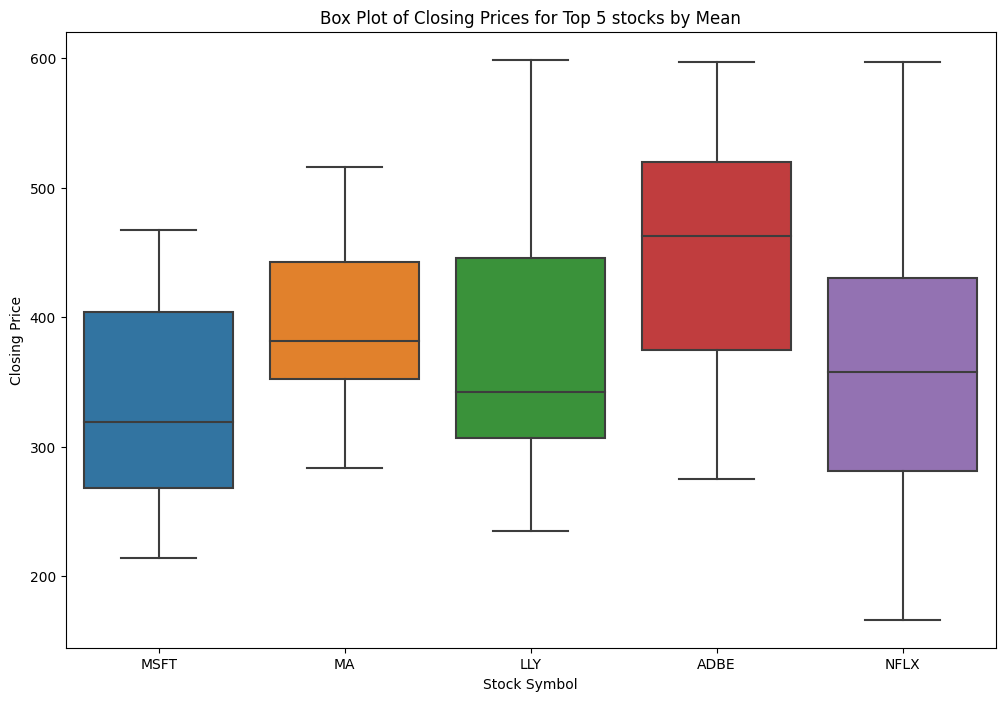

In [454]:
top_symbols = data.groupby('symbol')['close'].mean().nlargest(5).index
data['symbol'].value_counts().head(5).index

# Filter the data to only include the top 5 symbols
top_symbols_data = data[data['symbol'].isin(top_symbols)]

# Create box plots for 'Close' prices of the top 5 symbols to compare distributions
plt.figure(figsize=(12, 8))
sns.boxplot(x='symbol', y='close', data=top_symbols_data)
plt.title("Box Plot of Closing Prices for Top 5 stocks by Mean")
plt.xlabel("Stock Symbol")
plt.ylabel("Closing Price")
plt.show()

In [455]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20371 entries, 0 to 21449
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       20371 non-null  datetime64[ns, UTC]
 1   symbol     20371 non-null  object             
 2   open       20371 non-null  float64            
 3   high       20371 non-null  float64            
 4   low        20371 non-null  float64            
 5   close      20371 non-null  float64            
 6   adj_close  20371 non-null  float64            
 7   volume     20371 non-null  float64            
 8   beta       20371 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 1.6+ MB


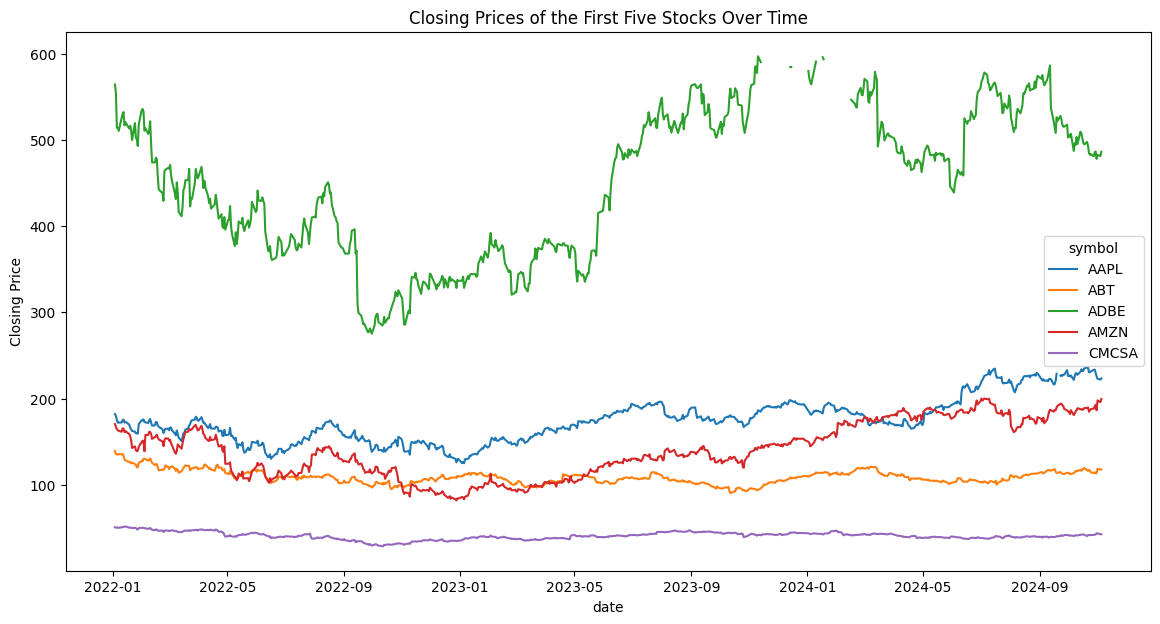

In [456]:
#for the first ten stocks
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns[:5]:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of the First Five Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()



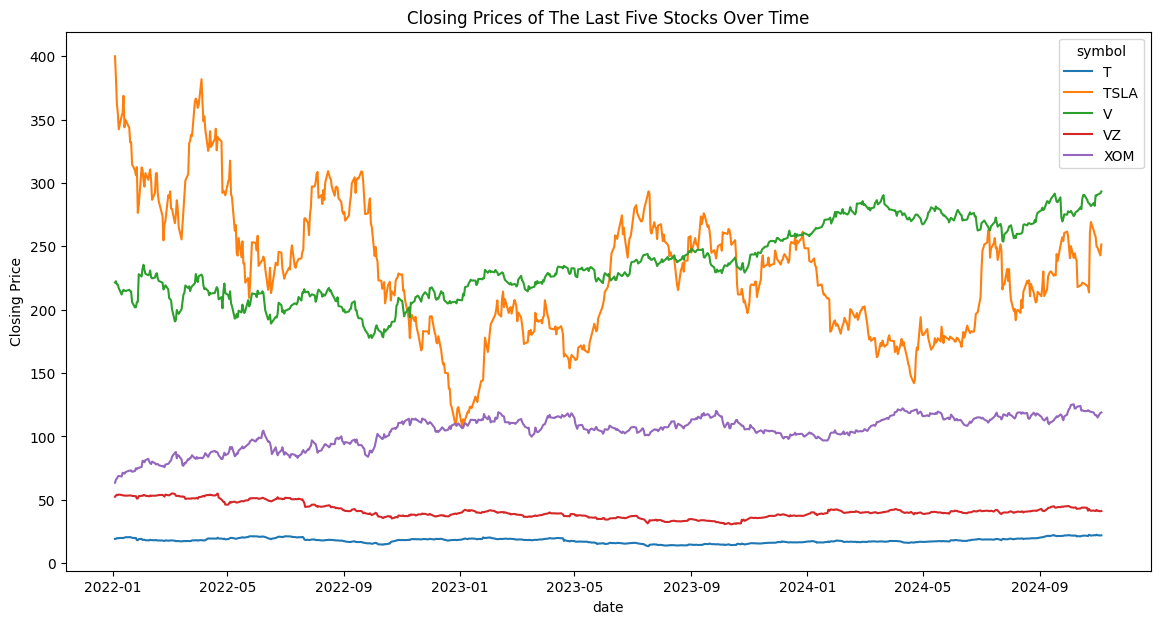

In [457]:
# for the last 5
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns[25:30]:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of The Last Five Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()


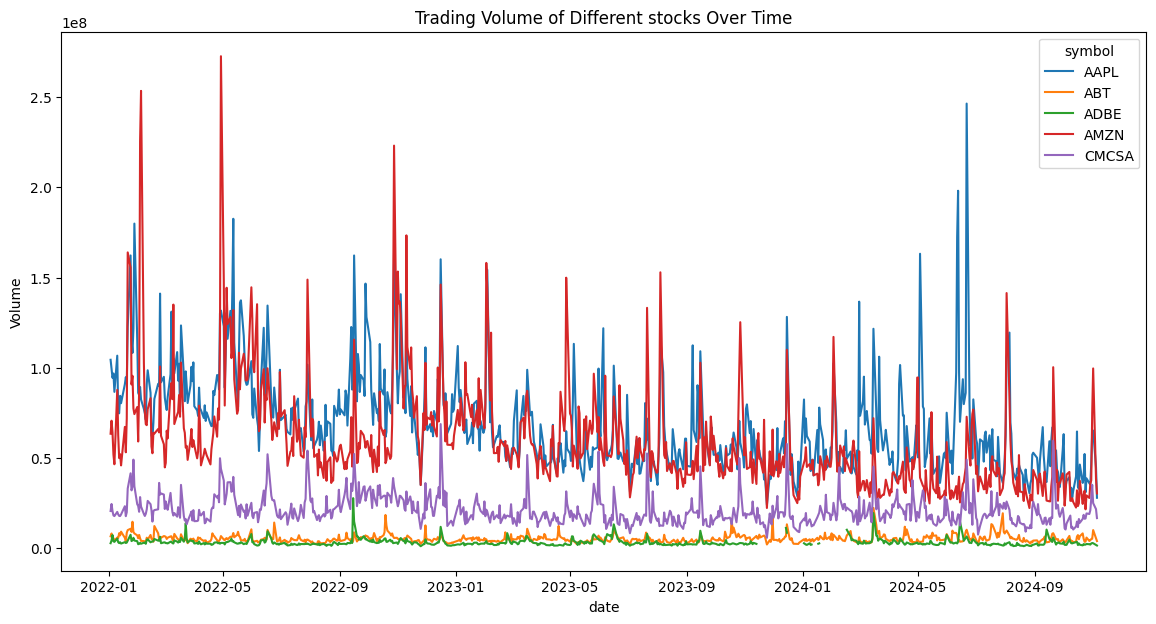

In [458]:
#stock volume over time
volumes = data.pivot(index='date', columns='symbol', values='volume')

# Plot
plt.figure(figsize=(14, 7))
for symbol in volumes.columns[:5]:
    plt.plot(volumes.index, volumes[symbol], label=symbol)
plt.title('Trading Volume of Different stocks Over Time')
plt.xlabel('date')
plt.ylabel('Volume')
plt.legend(title='symbol')
plt.show()


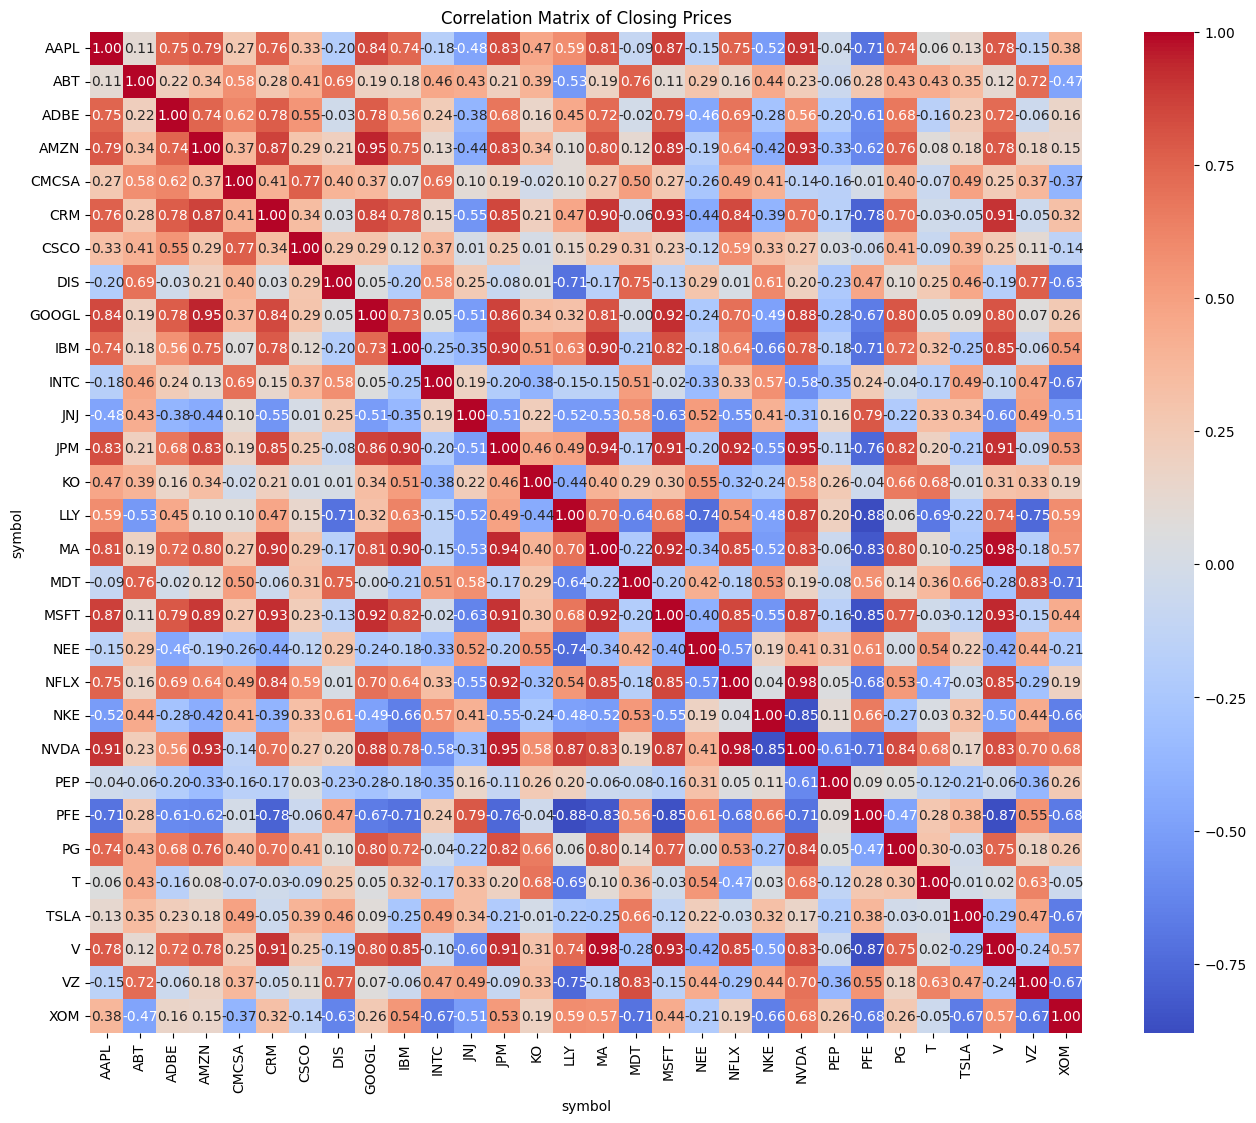

In [459]:
# Calculate the correlation matrix
corr_matrix = closing_prices.corr()

# Plot heatmap
plt.figure(figsize=(16, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Closing Prices')
plt.show()


C:\Users\jeffr\AppData\Local\Temp\ipykernel_12452\3898994917.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = closing_prices.pct_change()
c:\Users\jeffr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jeffr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jeffr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is d

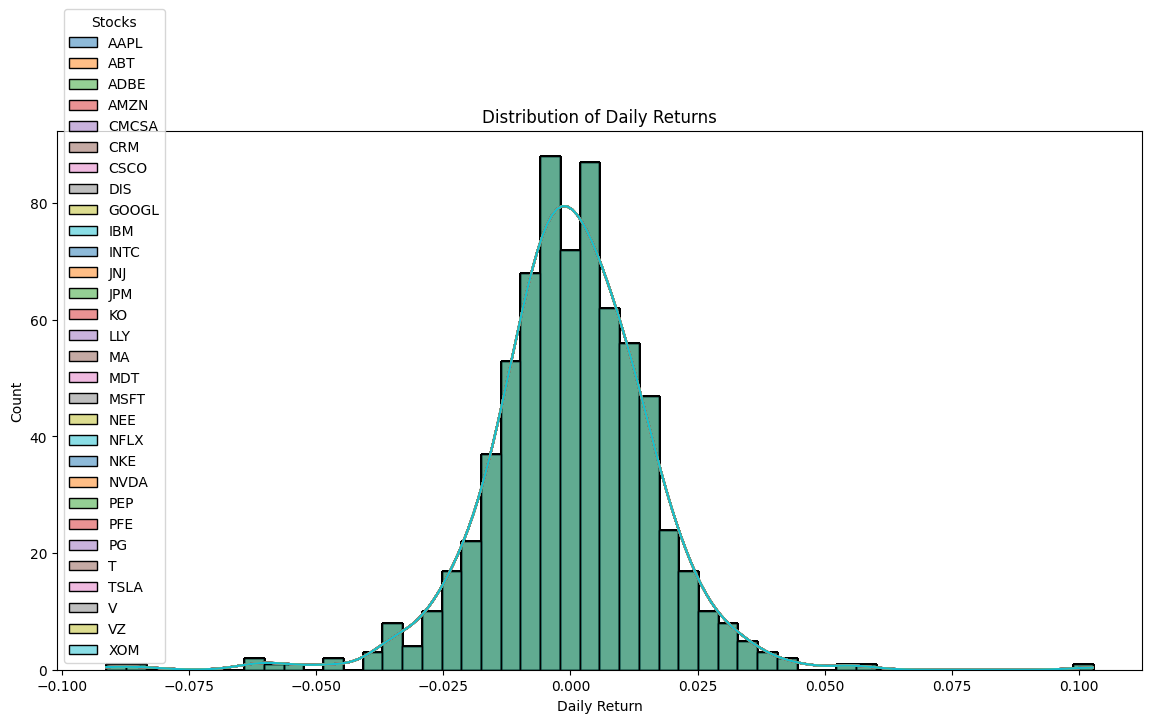

In [460]:
# Calculate daily returns
daily_returns = closing_prices.pct_change()

# Plot distribution of daily returns for each stock
plt.figure(figsize=(14, 7))
for stock in daily_returns.columns:
    sns.histplot(daily_returns[symbol], kde=True, label=stock, bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.legend(title='Stocks')
plt.show()


## FEATURE ENGINEERING

In [461]:
# Ensure Date is in datetime format
data['date'] = pd.to_datetime(data['date'])

In [462]:
# Sort data by Symbol and Date
data = data.sort_values(by=['symbol', 'date'])

### Daily Returns:

- Measures how much the stock price changes between consecutive days. This helps in understanding daily volatility.

In [463]:
# 1. Calculate Daily Returns
data['daily_return'] = data.groupby('symbol')['close'].transform(lambda x: x.pct_change())

### Moving Averages (SMA & EMA):

- SMA provides a smooth average price over a period, while EMA assigns more weight to recent prices, making it more responsive to changes.

In [464]:
grouped = data.groupby('symbol')

In [465]:
# 2. Simple Moving Averages (SMA)
# 7-day, 14-day, and 30-day rolling averages
# Use transform for rolling operations to ensure same length output
data['SMA_7'] = grouped['close'].transform(lambda x: x.rolling(window=7).mean())
data['SMA_14'] = grouped['close'].transform(lambda x: x.rolling(window=14).mean())



In [466]:
# 3. Exponential Moving Averages (EMA)
# Define a function to calculate EMA
def calculate_ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

# Group by 'Symbol' and calculate EMA using transform
data['EMA_7'] = data.groupby('symbol')['close'].transform(lambda x: calculate_ema(x, 7))
data['EMA_14'] = data.groupby('symbol')['close'].transform(lambda x: calculate_ema(x, 14))


### Volatility:

- Calculated using the rolling standard deviation of returns to indicate how much the price fluctuates over a period

In [467]:
# 4. Volatility (Rolling Standard Deviation of Returns)

data['Volatility_7d'] = data.groupby('symbol')['daily_return'].transform(lambda x: x.rolling(window=7).std())
data['Volatility_14d'] = data.groupby('symbol')['daily_return'].transform(lambda x: x.rolling(window=14).std())



### RSI (Relative Strength Index):

- Identifies whether a stock is overbought or oversold. It ranges between 0 and 100, with values above 70 indicating overbought and below 30 indicating oversold.

In [468]:
# 5. Relative Strength Index (RSI)

def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, abs(delta), 0)
    
    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
data['RSI_14'] = data.groupby('symbol')['close'].transform(lambda x: calculate_rsi(x, 14))

### Bollinger Bands:

- A volatility indicator with upper and lower bands around a moving average. If the price breaks these bands, it may indicate potential reversals.

In [469]:

# 6. Bollinger Bands

# data['Bollinger_Mid'] = data['SMA_20'] = grouped['close'].rolling(window=20).mean()
# data['Bollinger_Upper'] = data['SMA_20'] + (grouped['close'].rolling(window=20).std() * 2)
# data['Bollinger_Lower'] = data['SMA_20'] - (grouped['close'].rolling(window=20).std() * 2)

### 7. Bollinger Bands (20-day SMA ± 2 * Rolling Std Dev)
data['SMA_20'] = data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).mean())
data['BB_Upper'] = data['SMA_20'] + 2 * data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).std())
data['BB_Lower'] = data['SMA_20'] - 2 * data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).std())


### Time-Based Features:

- Adds useful information, such as the day of the week, month, and quarter, to help capture seasonal or cyclical patterns in stock behavior.

In [470]:
# 7. Time-Based Features

data['Day_of_Week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['Month'] = data['date'].dt.month
data['Quarter'] = data['date'].dt.quarter


In [471]:
### 8. Lag Features (Previous Days' Prices)
# Create lag features for Open, High, Low, and Close
for lag in range(1, 4):  # Lag of 1 to 3 days
    data[f'Open_Lag_{lag}'] = data.groupby('symbol')['open'].transform(lambda x: x.shift(lag))
    data[f'High_Lag_{lag}'] = data.groupby('symbol')['high'].transform(lambda x: x.shift(lag))
    data[f'Low_Lag_{lag}'] = data.groupby('symbol')['low'].transform(lambda x: x.shift(lag))
    data[f'Close_Lag_{lag}'] = data.groupby('symbol')['close'].transform(lambda x: x.shift(lag))

In [472]:
### 8. Moving Average Convergence Divergence (MACD)
# MACD = 12-day EMA - 26-day EMA
data['EMA_12'] = data.groupby('symbol')['close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
data['EMA_26'] = data.groupby('symbol')['close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
data['MACD'] = data['EMA_12'] - data['EMA_26']

In [473]:
# 9. Handle NaN Values (if any from rolling operations)

data.fillna(method='bfill', inplace=True)



C:\Users\jeffr\AppData\Local\Temp\ipykernel_12452\414341411.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [474]:

# 10. Save to CSV for further use
data.to_csv('engineered_stocks_data.csv', index=False)

In [475]:

# Display the first few rows of the engineered DataFrame
data.columns

Index(['date', 'symbol', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'beta', 'daily_return', 'SMA_7', 'SMA_14', 'EMA_7', 'EMA_14',
       'Volatility_7d', 'Volatility_14d', 'RSI_14', 'SMA_20', 'BB_Upper',
       'BB_Lower', 'Day_of_Week', 'Month', 'Quarter', 'Open_Lag_1',
       'High_Lag_1', 'Low_Lag_1', 'Close_Lag_1', 'Open_Lag_2', 'High_Lag_2',
       'Low_Lag_2', 'Close_Lag_2', 'Open_Lag_3', 'High_Lag_3', 'Low_Lag_3',
       'Close_Lag_3', 'EMA_12', 'EMA_26', 'MACD'],
      dtype='object')

In [476]:
correlation_matrix = data.drop(columns=['symbol']).corr()

print(correlation_matrix)

                    date      open      high       low     close  adj_close  \
date            1.000000  0.053200  0.050498  0.056291  0.053491   0.066488   
open            0.053200  1.000000  0.999837  0.999821  0.999645   0.999352   
high            0.050498  0.999837  1.000000  0.999757  0.999823   0.999568   
low             0.056291  0.999821  0.999757  1.000000  0.999837   0.999502   
close           0.053491  0.999645  0.999823  0.999837  1.000000   0.999701   
adj_close       0.066488  0.999352  0.999568  0.999502  0.999701   1.000000   
volume          0.000110 -0.142111 -0.138550 -0.145999 -0.142217  -0.135025   
beta            0.008132  0.385011  0.388515  0.381310  0.384806   0.397135   
daily_return    0.032374  0.004024  0.011419  0.012238  0.019665   0.019798   
SMA_7           0.050718  0.999111  0.999042  0.998925  0.998862   0.998570   
SMA_14          0.048149  0.997778  0.997744  0.997501  0.997488   0.997203   
EMA_7           0.050240  0.999392  0.999363  0.9992

In [477]:
data.isna().sum()

date                0
symbol              0
open                0
high                0
low                 0
close               0
adj_close           0
volume              0
beta                0
daily_return        0
SMA_7               0
SMA_14              0
EMA_7               0
EMA_14              0
Volatility_7d       0
Volatility_14d      0
RSI_14            691
SMA_20              0
BB_Upper            0
BB_Lower            0
Day_of_Week         0
Month               0
Quarter             0
Open_Lag_1          0
High_Lag_1          0
Low_Lag_1           0
Close_Lag_1         0
Open_Lag_2          0
High_Lag_2          0
Low_Lag_2           0
Close_Lag_2         0
Open_Lag_3          0
High_Lag_3          0
Low_Lag_3           0
Close_Lag_3         0
EMA_12              0
EMA_26              0
MACD                0
dtype: int64

In [478]:
data.dropna(subset=['RSI_14'], inplace=True)

In [479]:
# Calculate correlations for all features with each target
data_numeric = data.select_dtypes(include=[float, int])
correlations = {}
targets = ['adj_close','BB_Upper', 'BB_Lower']
for target in targets:
    correlations[target] = data_numeric.corr()[target].abs()  # Absolute correlation to check magnitude

# Combine the correlations into a single DataFrame
correlation_df = pd.DataFrame(correlations)
# Set a correlation threshold
corr_threshold = 0.5

# Find features with high correlation with at least one target
selected_features = correlation_df[(correlation_df > corr_threshold).all(axis=1)].index

# Filter the original DataFrame to include only these selected features
filtered_df = data[selected_features]

print(selected_features)

Index(['open', 'high', 'low', 'close', 'adj_close', 'SMA_7', 'SMA_14', 'EMA_7',
       'EMA_14', 'SMA_20', 'BB_Upper', 'BB_Lower', 'Open_Lag_1', 'High_Lag_1',
       'Low_Lag_1', 'Close_Lag_1', 'Open_Lag_2', 'High_Lag_2', 'Low_Lag_2',
       'Close_Lag_2', 'Open_Lag_3', 'High_Lag_3', 'Low_Lag_3', 'Close_Lag_3',
       'EMA_12', 'EMA_26'],
      dtype='object')


In [422]:
# Assuming df is your DataFrame and 'Close' is the target column
data_numeric = data.select_dtypes(include=[float, int])
corr_threshold = 0.7  # Adjust this threshold as needed
correlations = data_numeric.corr()['close'].abs()
selected_features = correlations[correlations > corr_threshold].index

filtered_df = data[selected_features]

print(selected_features)

Index(['open', 'high', 'low', 'close', 'adj_close', 'SMA_7', 'SMA_14', 'EMA_7',
       'EMA_14', 'SMA_20', 'BB_Upper', 'BB_Lower', 'Open_Lag_1', 'High_Lag_1',
       'Low_Lag_1', 'Close_Lag_1', 'Open_Lag_2', 'High_Lag_2', 'Low_Lag_2',
       'Close_Lag_2', 'Open_Lag_3', 'High_Lag_3', 'Low_Lag_3', 'Close_Lag_3',
       'EMA_12', 'EMA_26'],
      dtype='object')


In [480]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df)

pca = PCA(n_components=3)  # You can specify the number of components, e.g., PCA(n_components=5)
pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)

pca_df = pd.DataFrame(
    data=pca_data,
    columns=[f'PC{i+1}' for i in range(pca_data.shape[1])]
)

print(pca_df)

            PC1       PC2       PC3
0      0.850246 -0.094033  0.057763
1      0.850717 -0.097687  0.056536
2      0.818438 -0.070280  0.053164
3      0.758683 -0.020077  0.047811
4      0.703182  0.012705  0.043185
...         ...       ...       ...
19675 -3.578577 -0.053657  0.037715
19676 -3.530860 -0.073116  0.042235
19677 -3.486196 -0.089970  0.045755
19678 -3.446883 -0.091683  0.045255
19679 -3.394188 -0.094401  0.050033

[19680 rows x 3 columns]


## Modelling

In [481]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select relevant features for clustering
#features = data[['beta', 'Volatility_14d','Volatility_7d','BB_Upper', 'BB_Lower', 'daily_return']]

# Step 2: Scale the features for better clustering performance
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Risk_Cluster'] = kmeans.fit_predict(pca_df)

# Step 4: Label the clusters as Low, Medium, and High risk
# Optionally, analyze cluster means to assign proper labels
cluster_mapping = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
data['Risk_Label'] = data['Risk_Cluster'].map(cluster_mapping)

# Step 5: Visualize clusters with PCA (2D reduction)
#pca = PCA(n_components=2)
#reduced_features = pca.fit_transform(scaled_features)

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], 
#                 hue=data['Risk_Label'], palette='viridis', s=50)
# plt.title('Risk Clusters of Stocks (K-Means + PCA)')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.show()

# # Step 6: Save results (Optional)
# data[['date', 'symbol', 'Risk_Label']].to_csv('stock_risk_clusters.csv', index=False)

c:\Users\jeffr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [406]:
data.to_csv('stock_flask.csv', index=False)

In [482]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, data['Risk_Cluster'])

# Step 3: Print the Silhouette Score
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.595


In [408]:
data['Risk_Label'].value_counts()

Risk_Label
Medium Risk    9118
High Risk      7829
Low Risk       2733
Name: count, dtype: int64

In [117]:
df = pd.read_csv('stock_risk_clusters.csv')

In [118]:
df.tail(20)

,date,symbol,Risk_Label
20290,2024-10-07 00:00:00+00:00,XOM,Low Risk
20291,2024-10-08 00:00:00+00:00,XOM,Low Risk
20292,2024-10-09 00:00:00+00:00,XOM,Low Risk
20293,2024-10-10 00:00:00+00:00,XOM,Low Risk
20294,2024-10-11 00:00:00+00:00,XOM,Low Risk
20295,2024-10-14 00:00:00+00:00,XOM,Low Risk
20296,2024-10-15 00:00:00+00:00,XOM,Low Risk
20297,2024-10-16 00:00:00+00:00,XOM,Low Risk
20298,2024-10-17 00:00:00+00:00,XOM,Low Risk
20299,2024-10-18 00:00:00+00:00,XOM,Low Risk
